# Correlação
### Um pequeno estudo sobre os principais tipos de correlação

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exemplo utilizado para explicar o Tau de Kendall

In [7]:
df = pd.DataFrame({'X': [1,2,3,4,5], 'Y':[7,5,1,6,9]})
df

,X,Y
0,1,7
1,2,5
2,3,1
3,4,6
4,5,9


### Calcular correlação com o Pandas

#### Carregar o dataset "mpg.data"

In [8]:
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

mpg_data = pd.read_csv(path, delim_whitespace=True, header=None,
            names = ['mpg', 'cylinders', 'displacement','horsepower',
            'weight', 'acceleration', 'model_year', 'origin', 'name'],
            na_values='?')

#### Observar os dados

In [9]:
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#### Tratando dos valores ausentes

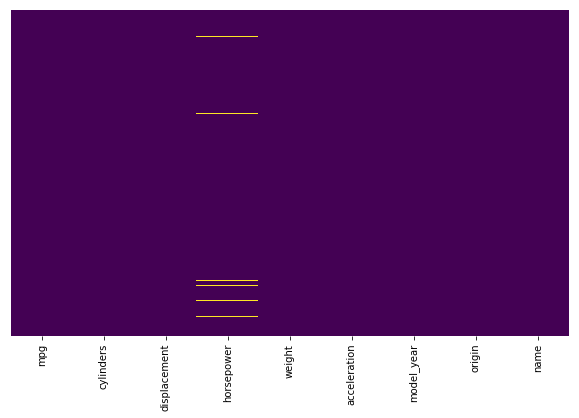

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(mpg_data.isnull(),cbar=False, yticklabels=False, cmap='viridis')
plt.show()

In [11]:
mpg_data.info() # 6 valores ausentes na coluna horsepower 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


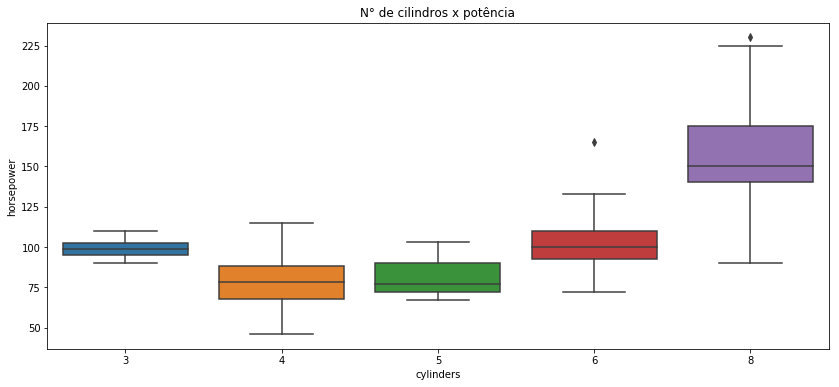

In [12]:
# Vamos preencher os valores faltantes na coluna horsepower pela média de potência de acordo com o n° de cilindros
plt.figure(figsize=(14,6))
sns.boxplot(x='cylinders', y='horsepower', data=mpg_data)
plt.title('N° de cilindros x potência')
plt.show()

In [14]:
# Verificar as médias
m3=round(np.mean(mpg_data["horsepower"][mpg_data["cylinders"]==3]))
m4=round(np.mean(mpg_data["horsepower"][mpg_data["cylinders"]==4]))
m5=round(np.mean(mpg_data["horsepower"][mpg_data["cylinders"]==5]))
m6=round(np.mean(mpg_data["horsepower"][mpg_data["cylinders"]==6]))
m8=round(np.mean(mpg_data["horsepower"][mpg_data["cylinders"]==8]))
print(" Média de potência para 3 cilindros: ",m3, " \n Média de potência para 4 cilindros: ",m4, 
      "\n Média de potência para 5 cilindros: ",m5, "\n Média de potência para 6 cilindros: ",m6, 
      "\n Média de potência para 8 cilindros: ",m8)

 Média de potência para 3 cilindros:  99  
 Média de potência para 4 cilindros:  78 
 Média de potência para 5 cilindros:  82 
 Média de potência para 6 cilindros:  102 
 Média de potência para 8 cilindros:  158


In [16]:
# Função para atualizar a coluna horsepower com o valores das médias
def horsepower_update(cols):
    horsepower = cols[0]
    cylinders = cols[1]
    
    if pd.isnull(horsepower):
        if cylinders == 3:
            return m3
        elif cylinders == 4:
            return m4
        elif cylinders == 5:
            return m5
        elif cylinders == 6:
            return m6
        else: return m8
    else: return horsepower

In [17]:
# Aplicar função para atualizar valores da coluna horsepower
mpg_data['horsepower']=mpg_data[['horsepower','cylinders']].apply(horsepower_update, axis=1)

In [18]:
# Verificando se os valores estão completos
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


####  Calculando a correlação

In [19]:
mpg_data['mpg'].corr(mpg_data['weight'])

-0.8317409332443352

In [24]:
mpg_data.corr() # Método de Pearson

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.775641,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.843832,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897538,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.775641,0.843832,0.897538,1.000000,0.863603,-0.688024,-0.416903,-0.450328
weight,-0.831741,0.896017,0.932824,0.863603,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.688024,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.416903,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.450328,-0.581024,0.205873,0.180662,1.000000


In [28]:
mpg_data.corr(method='spearman') # Método de Spearman

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.821864,-0.855692,-0.851179,-0.874947,0.438677,0.573469,0.580694
cylinders,-0.821864,1.000000,0.911876,0.815360,0.873314,-0.474189,-0.335012,-0.604550
displacement,-0.855692,0.911876,1.000000,0.874455,0.945986,-0.496512,-0.305257,-0.707197
horsepower,-0.851179,0.815360,0.874455,1.000000,0.875417,-0.653532,-0.390900,-0.506318
weight,-0.874947,0.873314,0.945986,0.875417,1.000000,-0.404550,-0.277015,-0.628434
acceleration,0.438677,-0.474189,-0.496512,-0.653532,-0.404550,1.000000,0.274632,0.220574
model_year,0.573469,-0.335012,-0.305257,-0.390900,-0.277015,0.274632,1.000000,0.166551
origin,0.580694,-0.604550,-0.707197,-0.506318,-0.628434,0.220574,0.166551,1.000000


In [26]:
# Correlação "em cores"
mpg_data.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.0,-0.78,-0.8,-0.78,-0.83,0.42,0.58,0.56
cylinders,-0.78,1.0,0.95,0.84,0.9,-0.51,-0.35,-0.56
displacement,-0.8,0.95,1.0,0.9,0.93,-0.54,-0.37,-0.61
horsepower,-0.78,0.84,0.9,1.0,0.86,-0.69,-0.42,-0.45
weight,-0.83,0.9,0.93,0.86,1.0,-0.42,-0.31,-0.58
acceleration,0.42,-0.51,-0.54,-0.69,-0.42,1.0,0.29,0.21
model_year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.0,0.18
origin,0.56,-0.56,-0.61,-0.45,-0.58,0.21,0.18,1.0
